In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load data
df = pd.read_csv('data/individual_calibration_set.csv')

Bx, By, Bz = df['B_x'].to_numpy(), df['B_y'].to_numpy(), df['B_z'].to_numpy() # Extract fields
V1, V2, V3 = df['V_1'].to_numpy(), df['V_2'].to_numpy(), df['V_3'].to_numpy()  # Extract voltages

## Calibration

### Function to find slope values and plot graphs

In [3]:
def find_slopes(x:np.array, y1:np.array, y2:np.array, y3:np.array):
    """plots y1, y2, and y3 vs x and returns the corresponding slopes"""
    index = x != 0 # Indexes for which v is non-zero
    x, y1, y2, y3 = x[index], y1[index], y2[index], y3[index] # Values for which v is non-zero
    # Apply regression. Data need to be reshaped
    reg1 = LinearRegression().fit(x.reshape(-1, 1), y1.reshape(-1, 1))
    reg2 = LinearRegression().fit(x.reshape(-1, 1), y2.reshape(-1, 1))
    reg3 = LinearRegression().fit(x.reshape(-1, 1), y3.reshape(-1, 1))

    # Plot
    fig, ax = plt.subplots()
    ax.plot(x, y1, label=r'$B_x$', linewidth=4.0)
    ax.plot(x, reg1.predict(x.reshape(-1, 1), ), label=r'$B_x$ Fit', linewidth=4.0, color='black', ls='--')

    ax.plot(x, y2, label=r'$B_y$', linewidth=4.0)
    ax.plot(x, reg2.predict(x.reshape(-1, 1), ), label=r'$B_y$ Fit', linewidth=4.0, color='black', ls='--')

    ax.plot(x, y3, label=r'$B_z$', linewidth=4.0)
    ax.plot(x, reg3.predict(x.reshape(-1, 1), ), label=r'$B_z$ Fit', linewidth=4.0, color='black', ls='--')
    ax.set_ylabel('Field (arb. u.)' )
    #ax.set_xlim(0,1)
    ax.legend(loc=0)
    ax.grid()

    # Slope values
    k1, k2, k3 = float(reg1.coef_), float(reg2.coef_), float(reg3.coef_)
    return k1, k2, k3, ax

### Field vs $V_1$

kx1, ky1, kz1 = 
5.303300858899106, 0.0, 1.7677669529663678


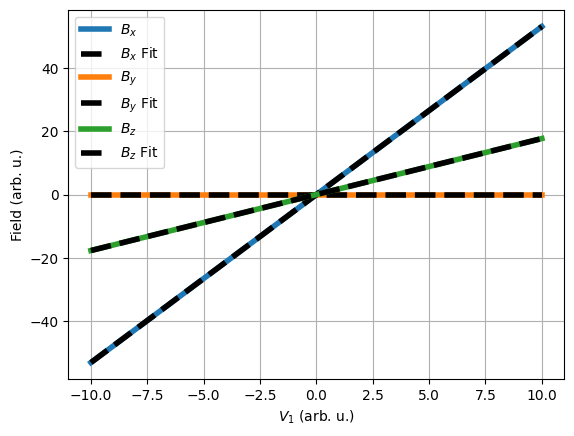

In [4]:
kx1, ky1, kz1, ax1 = find_slopes(V1, Bx, By, Bz)
ax1.set_xlabel(r'$V_1$ (arb. u.)')
print(r'kx1, ky1, kz1 = ')
print(kx1, ky1, kz1, sep=', ')

### Field vs $V_2$

k2x, k2y, k2z = 
-2.6516504294495538, 4.5927932677184575, 1.7677669529663678


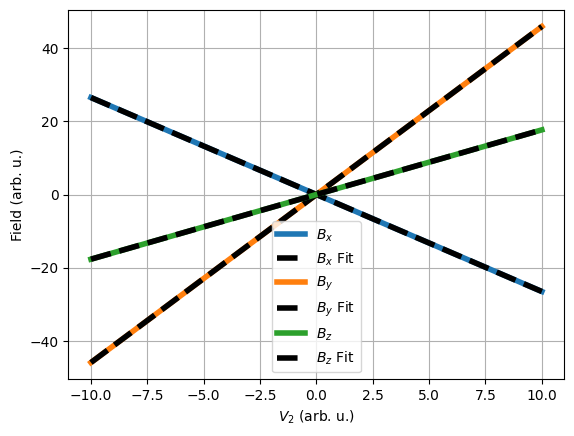

In [5]:
kx2, ky2, kz2, ax2 = find_slopes(V2, Bx, By, Bz)
ax2.set_xlabel(r'$V_2$ (arb. u.)')
print(r'k2x, k2y, k2z = ')
print(kx2, ky2, kz2, sep=', ')

### Field vs $V_3$

kx3, ky3, kz3 = 
-2.6516504294495538, -4.5927932677184575, 1.7677669529663678


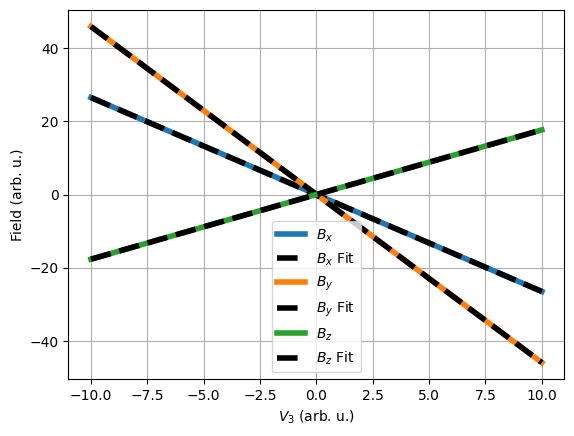

In [6]:
kx3, ky3, kz3, ax3 = find_slopes(V3, Bx, By, Bz)
ax3.set_xlabel(r'$V_3$ (arb. u.)')
print(r'kx3, ky3, kz3 = ')
print(kx3, ky3, kz3, sep=', ')

### Calibration matrix

In [7]:
# Slope matrix
M = np.array([[kx1, kx2, kx3],
               [ky1, ky2, ky3],
               [kz1, kz2, kz3]])
# Calibration
M_ = np.linalg.inv(M)
print('calibration matrix\n', M_)

calibration matrix
 [[ 1.25707872e-01  2.26055980e-17  1.88561808e-01]
 [-6.28539361e-02  1.08866211e-01  1.88561808e-01]
 [-6.28539361e-02 -1.08866211e-01  1.88561808e-01]]


In [8]:
# Check
np.dot(M,M_)

array([[ 1.00000000e+00,  9.48716153e-18,  1.51295404e-17],
       [ 2.19208655e-18,  1.00000000e+00, -4.77095556e-17],
       [-5.85647417e-17,  9.12607213e-17,  1.00000000e+00]])

In [9]:
# Save the calibration matrix as csv
np.savetxt("data/lin_cal_mat.csv", M_)